In [106]:
import pandas as pd
import numpy as np
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import collections

plt.rcParams.update({'font.size': 14})
usedSimTimeLimit = 15768000

In [121]:
# Create independent pandas dataframe sets for each botmaster type
botmasterV1 = {}
botmasterV2 = {}
botmasterV3 = {}
path = "results"

for f in listdir(path):
    filePath = join(path, f)

    if not isfile(filePath):
        continue

    #print(f)
        
    m = re.search(r"(\d+):(\d+):(\d+).csv", f)
    if m:
        botmasterId = int(m.group(1))
        distributionPercentage = int(m.group(2))
        simTimeLimit = int(m.group(3))

        if simTimeLimit == usedSimTimeLimit:
            if botmasterId == 2:
                #if not simTimeLimit in botmasterV2:
                 #   botmasterV2[simTimeLimit] = {}
                botmasterV2[distributionPercentage] = pd.read_csv(filePath)
            elif botmasterId == 3:
                #if not simTimeLimit in botmasterV3:
                 #   botmasterV3[simTimeLimit] = {}
                botmasterV3[distributionPercentage] = pd.read_csv(filePath)
            
botmasterV2 = collections.OrderedDict(sorted(botmasterV2.items(), key=lambda kv: kv[0]))
botmasterV3 = collections.OrderedDict(sorted(botmasterV3.items(), key=lambda kv: kv[0]))

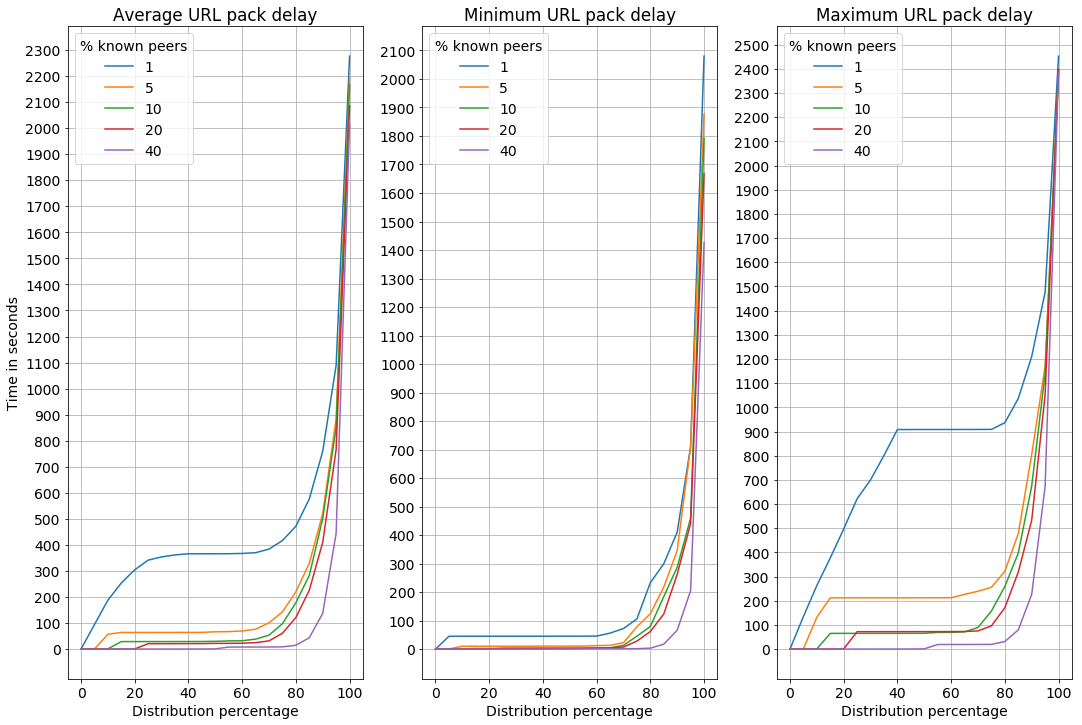

In [125]:
# Botmaster V2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,12))
#fig.suptitle('BV2')
ax1.set(xlabel='Distribution percentage', ylabel='Time in seconds', title='Average URL pack delay',
        yticks=np.arange(0, 2400, 100))
ax2.set(xlabel='Distribution percentage', title='Minimum URL pack delay',
       yticks=np.arange(0, 2300, 100))
ax3.set(xlabel='Distribution percentage', title='Maximum URL pack delay',
       yticks=np.arange(0, 2600, 100))
ax1.grid()
ax2.grid()
ax3.grid()

x = np.arange(0, 101, 5)

for distributionPercentage, dataframe in botmasterV2.items():
    ax1.plot(x, dataframe['Propagation Time'], label=distributionPercentage)
    ax2.plot(x, dataframe['Min Delay'], label=distributionPercentage)
    ax3.plot(x, dataframe['Max Delay'], label=distributionPercentage)
            
ax1.legend(title='% known peers')
ax2.legend(title='% known peers')
ax3.legend(title='% known peers')

fig.savefig('figures/BV2.png', dpi=fig.dpi)

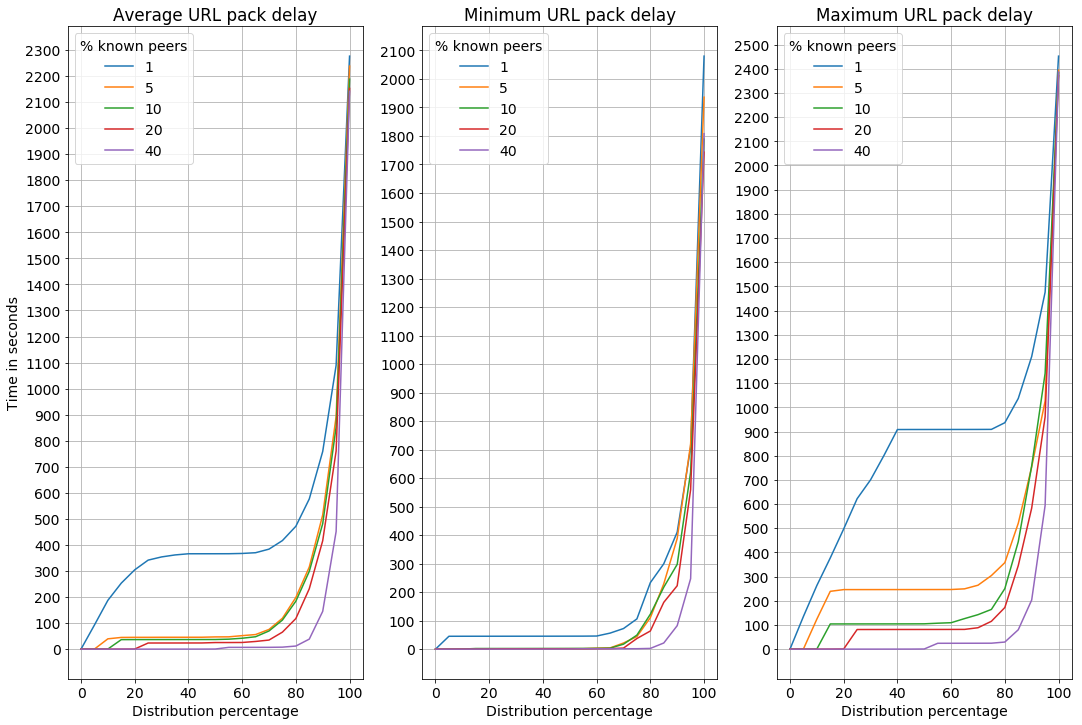

In [126]:
# Botmaster V3
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,12))
ax1.set(xlabel='Distribution percentage', ylabel='Time in seconds', title='Average URL pack delay',
        yticks=np.arange(0, 2400, 100))
ax2.set(xlabel='Distribution percentage', title='Minimum URL pack delay',
       yticks=np.arange(0, 2300, 100))
ax3.set(xlabel='Distribution percentage', title='Maximum URL pack delay',
       yticks=np.arange(0, 2600, 100))
ax1.grid()
ax2.grid()
ax3.grid()

x = np.arange(0, 101, 5)

for distributionPercentage, dataframe in botmasterV3.items():
    ax1.plot(x, dataframe['Propagation Time'], label=distributionPercentage)
    ax2.plot(x, dataframe['Min Delay'], label=distributionPercentage)
    ax3.plot(x, dataframe['Max Delay'], label=distributionPercentage)
            
ax1.legend(title='% known peers')
ax2.legend(title='% known peers')
ax3.legend(title='% known peers')

fig.savefig('figures/BV3.png', dpi=fig.dpi)